In [14]:
import sys

sys.path.append("..")

In [23]:
# create agent and environment

from qurious.environments import GridWorld

# Create a 10x10 maze with a guaranteed path
env = GridWorld(
    width=10,
    height=10,
    start_pos=(0, 0),  # Start at top-left
    goal_pos=[(9, 9)],  # Goal at bottom-right
    # obstacles=[
    #     # Top horizontal walls
    #     (0, 3),
    #     (1, 1),
    #     (1, 3),
    #     (1, 5),
    #     (1, 7),
    #     (1, 8),
    #     (2, 1),
    #     (2, 5),
    #     (2, 8),
    #     # Middle section
    #     (3, 1),
    #     (3, 3),
    #     (3, 5),
    #     (3, 7),
    #     (4, 3),
    #     (4, 5),
    #     (4, 7),
    #     (5, 0),
    #     (5, 1),
    #     (5, 7),
    #     (5, 9),
    #     # Bottom section
    #     (6, 1),
    #     (6, 3),
    #     (6, 5),
    #     (6, 7),
    #     (6, 9),
    #     (7, 1),
    #     (7, 3),
    #     (7, 5),
    #     (7, 6),
    #     (7, 7),
    #     (8, 1),
    #     (8, 3),
    #     (8, 5),
    #     (9, 5),
    #     (9, 8),
    # ],
    obstacles=0.2,
    terminal_reward=0.0,
    step_penalty=0.1,
    max_steps=200,
)

# Render the maze
print(env.render())

A # . # . . . # . #
. . . . . . . . # .
. . . # . . . . # .
# . # # . . . . . #
. . . . . # # . . .
. . . # . . . . . .
. . . . . . . . . .
. . . . . . # . . .
. . . # . . . . # .
. . . . # # # . . G



In [24]:
from qurious.agents import SarsaAgent
from qurious.policy import DeterministicTabularPolicy, EpsilonGreedyPolicy
from qurious.value_fns import TabularActionValueFunction

from IPython.display import clear_output
from time import sleep

# Create agent components
n_states = env.get_num_states()
n_actions = env.get_num_actions()

# Q-function
q_function = TabularActionValueFunction(n_states, n_actions)

# Base policy (will be updated based on Q-values)
base_policy = DeterministicTabularPolicy(n_states, n_actions)

# Epsilon-greedy exploration policy
epsilon = 0.5
policy = EpsilonGreedyPolicy(base_policy, epsilon, decay_rate=0.99)

# Create agent
agent = SarsaAgent(policy, q_function, gamma=0.99)
agent.enable_experience_tracking()


In [25]:
from qurious.utils import train_agent

train_agent(env, agent, num_episodes=1000)

↓ # → # ↑ ↑ → # ↑ #
→ ↓ → → → ↓ → ↓ # ↑
→ ↓ ↓ # ↓ ↓ ↓ ↓ # ↑
# ↓ # # ↓ → → ↓ ↓ #
↓ → ↓ → ↓ # # ↓ ↓ →
↓ ↓ ↓ # ↓ → → ↓ ↓ ↓
↓ ↓ → → → → → → ↓ ↓
→ → → → → ↓ # → → ↓
← ← ↓ # → → → ↓ # ↓
← ← ↓ ↑ # # # → → A



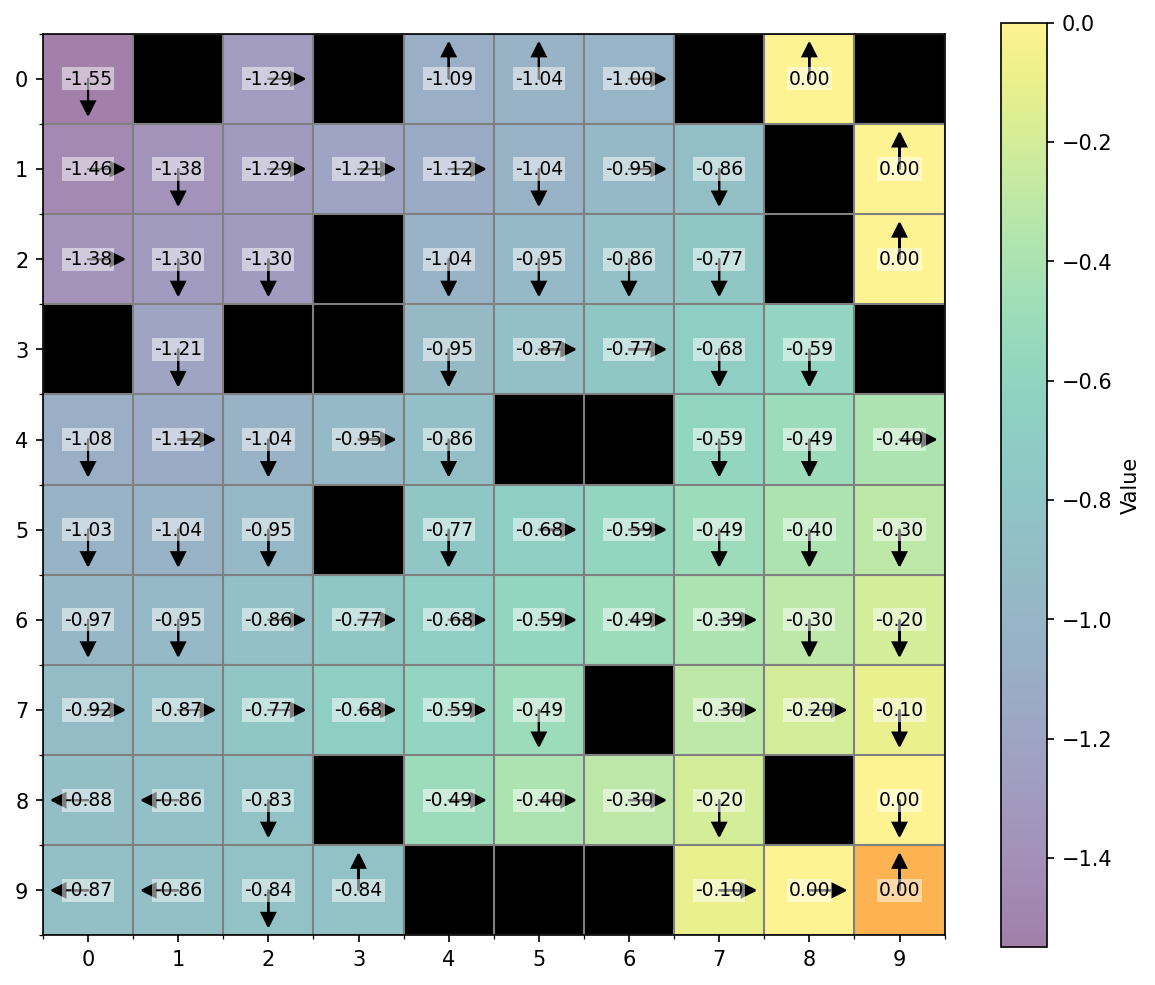

In [29]:
from qurious.visualization import (
    GridWorldVisualizer,
    AgentLayer,
    GridLayer,
    PolicyLayer,
    StateValueLayer,
    ActionValueLayer,
)

# Create visualizer
viz = GridWorldVisualizer(env)
viz.add_layer(GridLayer())
viz.add_layer(AgentLayer())
viz.add_layer(StateValueLayer(agent.Q))
# viz.add_layer(ActionValueLayer(agent.Q))
viz.add_layer(PolicyLayer(base_policy, arrow_color="black"))


viz.render_matplotlib(figsize=(8, 8))
print(viz.render_ascii())

In [35]:
from qurious.utils import run_agent


def step_callback(*args, **kwargs):
    clear_output(wait=True)
    print(viz.render_ascii())
    sleep(0.2)


run_agent(env, agent, num_episodes=1, step_callback=step_callback)


↓ # → # ↑ ↑ → # ↑ #
→ ↓ → → → ↓ → ↓ # ↑
→ ↓ ↓ # ↓ ↓ ↓ ↓ # ↑
# ↓ # # ↓ → → ↓ ↓ #
↓ → ↓ → ↓ # # ↓ ↓ →
↓ ↓ ↓ # ↓ → → ↓ ↓ ↓
↓ ↓ → → → → → → ↓ ↓
→ → → → → ↓ # → → ↓
← ← ↓ # → → → ↓ # ↓
← ← ↓ ↑ # # # → → A

